In [38]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

# Importing all required packages
import numpy as np
import pandas as pd
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

from sklearn import preprocessing

# Data viz lib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

In [39]:
bank = pd.read_csv('./input/bank-full.csv', sep=';')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [40]:
bank_cust = bank[['age','job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','poutcome']]
bank_cust['age_bin'] = pd.cut(bank_cust['age'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                              labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])
bank_cust  = bank_cust.drop('age',axis = 1)

In [41]:
bank_cust

,job,marital,education,default,housing,loan,contact,month,poutcome,age_bin
0,management,married,tertiary,no,yes,no,unknown,may,unknown,50-60
1,technician,single,secondary,no,yes,no,unknown,may,unknown,40-50
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,30-40
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,40-50
4,unknown,single,unknown,no,no,no,unknown,may,unknown,30-40
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,50-60
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,70-80
45208,retired,married,secondary,no,no,no,cellular,nov,success,70-80
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,50-60


In [42]:
# Checking Null values
bank_cust.isnull().sum()*100/bank_cust.shape[0]
# There are no NULL values in the dataset, hence it is clean.

job          0.0
marital      0.0
education    0.0
default      0.0
housing      0.0
loan         0.0
contact      0.0
month        0.0
poutcome     0.0
age_bin      0.0
dtype: float64

In [43]:
bank_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   job        45211 non-null  object  
 1   marital    45211 non-null  object  
 2   education  45211 non-null  object  
 3   default    45211 non-null  object  
 4   housing    45211 non-null  object  
 5   loan       45211 non-null  object  
 6   contact    45211 non-null  object  
 7   month      45211 non-null  object  
 8   poutcome   45211 non-null  object  
 9   age_bin    45211 non-null  category
dtypes: category(1), object(9)
memory usage: 3.1+ MB


In [44]:
# First we will keep a copy of data
bank_cust_copy = bank_cust.copy()

In [45]:
le = preprocessing.LabelEncoder()
bank_cust = bank_cust.apply(le.fit_transform)
bank_cust.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,age_bin
0,4,1,2,0,1,0,2,8,3,4
1,9,2,1,0,1,0,2,8,3,3
2,2,1,1,0,1,1,2,8,3,2
3,1,1,3,0,1,0,2,8,3,3
4,11,2,3,0,0,0,2,8,3,2


# K-Modes
---

In [46]:
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(bank_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5793, cost: 161026.0
Run 1, iteration: 2/100, moves: 2118, cost: 161026.0


In [47]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = bank_cust.columns

In [48]:
clusterCentroidsDf

,job,marital,education,default,housing,loan,contact,month,poutcome,age_bin
0,1,1,1,0,1,0,0,8,3,2
1,4,2,2,0,0,0,0,1,3,3


In [49]:
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(bank_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1453, cost: 178640.0


In [50]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(bank_cust)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 186772.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5793, cost: 161026.0
Run 1, iteration: 2/100, moves: 2118, cost: 161026.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5896, cost: 152164.0
Run 1, iteration: 2/100, moves: 4805, cost: 152164.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3764, cost: 149221.0


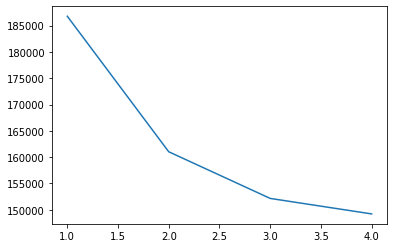

In [51]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

In [52]:
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(bank_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5793, cost: 161026.0
Run 1, iteration: 2/100, moves: 2118, cost: 161026.0


# K-Prototypes
---

In [58]:
df = bank[['age','job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','poutcome','balance']]
df['age_bin'] = pd.cut(df['age'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                              labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])
df['age_bin'] = df['age_bin'].astype(str)
df  = df.drop('age',axis = 1)

df.info()
df = df[0:1000]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job        45211 non-null  object
 1   marital    45211 non-null  object
 2   education  45211 non-null  object
 3   default    45211 non-null  object
 4   housing    45211 non-null  object
 5   loan       45211 non-null  object
 6   contact    45211 non-null  object
 7   month      45211 non-null  object
 8   poutcome   45211 non-null  object
 9   balance    45211 non-null  int64 
 10  age_bin    45211 non-null  object
dtypes: int64(1), object(10)
memory usage: 3.8+ MB


In [59]:
dfMatrix = df.to_numpy()
# Get the position of categorical columns
catColumnsPos = [df.columns.get_loc(col) for col in list(df.select_dtypes('object').columns)]
print('Categorical columns           : {}'.format(list(df.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'age_bin']
Categorical columns position  : [0, 1, 2, 3, 4, 5, 6, 7, 8, 10]


In [62]:
# Choose optimal K using Elbow method
cost = []
for cluster in range(2, 10):
    try:
        kprototype = KPrototypes(n_jobs=1, n_clusters=cluster, init='Cao', random_state=20)
        kprototype.fit_predict(dfMatrix, categorical=catColumnsPos)
        cost.append(kprototype.cost_)
        print(f'Cluster initiation: {cluster}')
    except:
        print(f'failed when the number of clusters: {cluster}')
        continue

Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9


In [63]:
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster': range(2, 10), 'Cost': cost})
# Data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

NameError: name 'plotnine' is not defined